In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.offline as pyo
import seaborn as sns

from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
from sklearn.metrics import accuracy_score

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv(r"C:\Users\Priya\Desktop\Projects-master\Heart Diseases Predict\Heart-Disease-Prediction-master\heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    
    print(df.columns[i]+"\t\t\t"+info[i])

age			age
sex			1: male, 0: female
cp			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps			resting blood pressure
chol			 serum cholestoral in mg/dl
fbs			fasting blood sugar > 120 mg/dl
restecg			resting electrocardiographic results (values 0,1,2)
thalach			 maximum heart rate achieved
exang			exercise induced angina
oldpeak			oldpeak = ST depression induced by exercise relative to rest
slope			the slope of the peak exercise ST segment
ca			number of major vessels (0-3) colored by flourosopy
thal			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
df.size

4242

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# VISUALIZATION

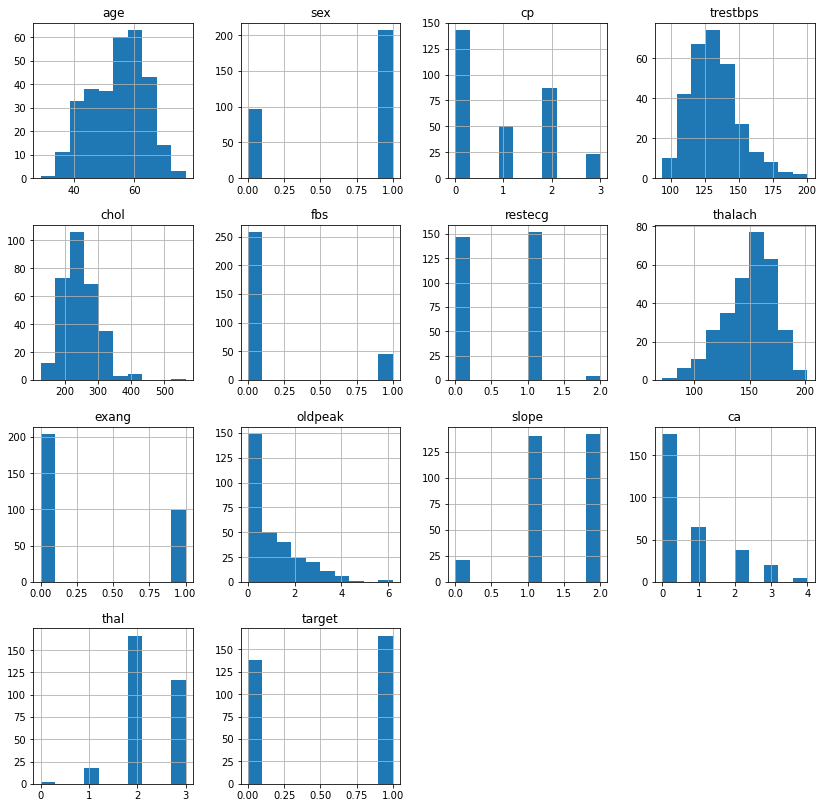

In [11]:
df.hist(figsize=(14,14))
plt.show()

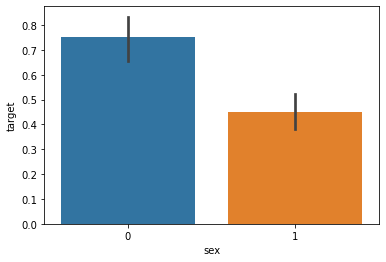

In [13]:
sns.barplot(df['sex'],df['target'])
plt.show()

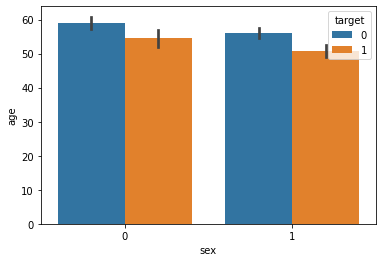

In [14]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [20]:
px.bar(df,df['sex'],df['target'])

In [15]:
numeric_columns=['trestbps','chol','age','oldpeak','thalach']

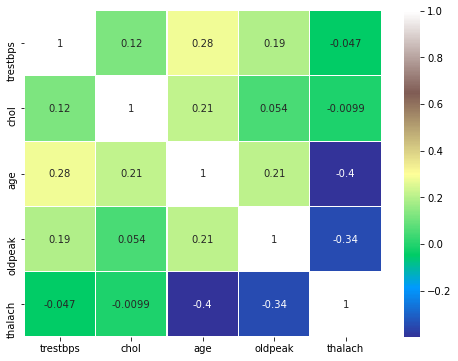

In [16]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Text(0.5, 1.0, 'Max Heart rate of Patients with heart Diseases')

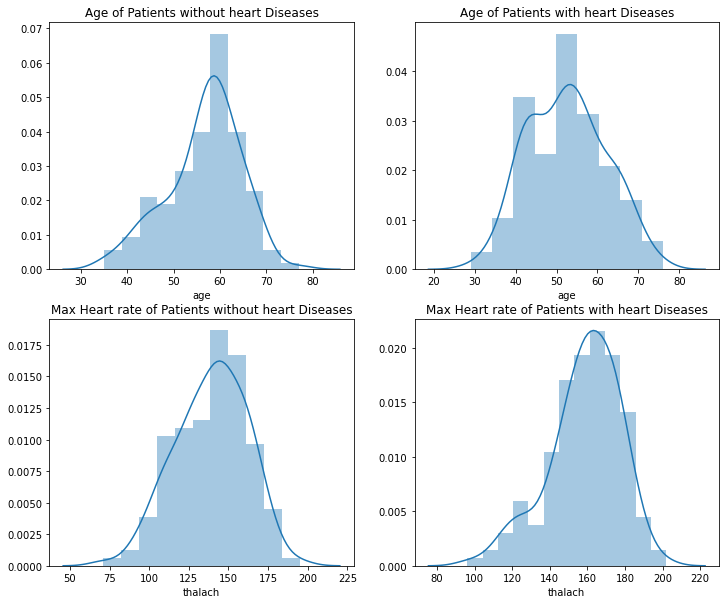

In [133]:
#create four displots

plt.figure(figsize=(12,10))

plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of Patients without heart Diseases')

plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of Patients with heart Diseases')

plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Max Heart rate of Patients without heart Diseases')

plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Max Heart rate of Patients with heart Diseases')

# DATA PREPROCESSING

In [19]:
X,Y=df.loc[:,:'thal'],df['target']

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
X.drop('fbs',axis=1,inplace=True)

NameError: name 'X' is not defined

In [260]:
from sklearn.preprocessing import StandardScaler

In [261]:
std=StandardScaler().fit(X)
x_std=std.transform(X)

In [266]:
x_std[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
       -1.00583187,  0.01544279, -0.69663055,  1.08733806, -2.27457861,
       -0.71442887, -2.14887271])

In [267]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [268]:
X.shape

(303, 12)

In [172]:
from sklearn.model_selection import train_test_split

In [279]:
x_train_std,x_test_std,y_train,y_test=train_test_split(x_std,Y,random_state=10,test_size=0.3,shuffle=True)

In [280]:
x_train_std.shape

(212, 12)

In [281]:
x_test.shape

(91, 12)

In [282]:
y_train

49     1
171    0
223    0
58     1
154    1
      ..
156    1
123    1
15     1
125    1
265    0
Name: target, Length: 212, dtype: int64

In [283]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [178]:
#Decision tree Classifier

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dt=DecisionTreeClassifier()

In [181]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [182]:
x_test

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,165,0,2.5,1,1,3
229,64,1,2,125,309,1,131,1,1.8,1,0,3
126,47,1,0,112,204,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,1,163,0,0.0,2,0,2
21,44,1,2,130,233,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,184,0,0.0,2,0,2


In [183]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [184]:
prediction=dt.predict(x_test)

In [185]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [186]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [187]:
accuracy_dt

78.02197802197803

In [188]:
dt.feature_importances_

array([0.03817042, 0.04391232, 0.32392476, 0.07195982, 0.07422397,
       0.0129521 , 0.11670907, 0.04724994, 0.07020507, 0.07300416,
       0.10975468, 0.01793368])

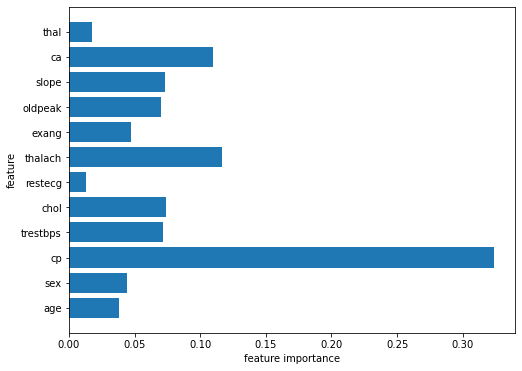

In [190]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_features=12
    plt.barh(range(n_features),model.feature_importances_)
    plt.yticks(np.arange(n_features),X)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1,n_features)
    
plot_feature_importance(dt)

In [192]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [199]:
Category=['No,You dont have Heart Diseases','Yes, You have Heart Diseases']

In [200]:
custom_data=np.array([[57,0,0,120,354,1,163,1,0.6,2,0,2]])

In [201]:
custom_data_prediction_dt=dt.predict(custom_data)

In [205]:
custom_data_prediction_dt

1

In [204]:
print(Category[int(custom_data_prediction_dt)])

Yes, You have Heart Diseases


# KNN ALGORITHM

In [322]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=8)

In [323]:
x_test_std

array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [324]:
prediction_knn=knn.predict(x_test_std)

In [325]:
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [326]:
accuracy_knn

84.61538461538461

In [327]:
custom_data_knn=np.array([[57,0,0,120,354,1,163,1,0.6,2,0,2]])

In [328]:
custom_data_knn_std=std.transform(custom_data_knn)

In [329]:
custom_data_knn_std

array([[ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
         0.89896224,  0.58393935,  1.43548113, -0.37924438,  0.97635214,
        -0.71442887, -0.51292188]])

In [330]:
custom_data_prediction_knn=knn.predict(custom_data_knn_std)

In [331]:
custom_data_prediction_knn

array([1], dtype=int64)

In [332]:
print(Category[int(custom_data_prediction_knn)])

Yes, You have Heart Diseases


In [333]:
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,Y_train)
    prediction_knn=knn.predict(x_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [334]:
scores

{1: 0.7582417582417582,
 2: 0.8131868131868132,
 3: 0.7912087912087912,
 4: 0.8131868131868132,
 5: 0.7912087912087912,
 6: 0.8131868131868132,
 7: 0.7912087912087912,
 8: 0.8461538461538461,
 9: 0.8021978021978022,
 10: 0.8241758241758241,
 11: 0.7802197802197802,
 12: 0.8131868131868132,
 13: 0.8021978021978022,
 14: 0.8021978021978022,
 15: 0.7912087912087912,
 16: 0.7912087912087912,
 17: 0.7802197802197802,
 18: 0.7912087912087912,
 19: 0.7802197802197802,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7802197802197802,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

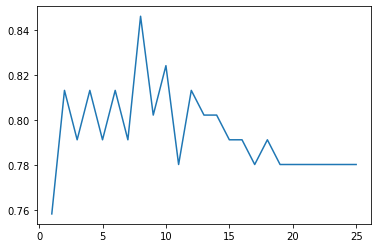

In [335]:
plt.plot(k_range,scores_list)

In [336]:
px.line(k_range,scores_list)

In [337]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

<AxesSubplot:>

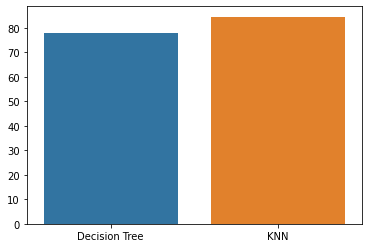

In [338]:
sns.barplot(algorithms,scores)